We experiment on how the # of training samples affects the CER of the LSTM model.

In [4]:
# Train model with different amounts of training data
# Leave validation set the same so that we have some baseline
# Trained with 60 epochs
users = ["single_user", "single_user_13", "single_user_10", "single_user_7", "single_user_4", "single_user_1"]
for user in users:
    print( f"Testing {user}:" )
    !python3.10 -m emg2qwerty.train \
      user={user} \
      trainer.accelerator=gpu trainer.devices=1 \
      +validate=False \
      --multirun

Testing single_user:
[2025-03-08 20:37:23,163][HYDRA] Submitit 'local' sweep output dir : logs/2025-03-08/20-37-23
[2025-03-08 20:37:23,164][HYDRA] 	#0 : user=single_user trainer.accelerator=gpu trainer.devices=1 +validate=False
Error executing job with overrides: ['user=single_user', 'trainer.accelerator=gpu', 'trainer.devices=1', '+validate=False']
Traceback (most recent call last):
  File "/home/fortemir/.local/lib/python3.10/site-packages/hydra/_internal/utils.py", line 220, in run_and_report
    return func()
  File "/home/fortemir/.local/lib/python3.10/site-packages/hydra/_internal/utils.py", line 466, in <lambda>
    lambda: hydra.multirun(
  File "/home/fortemir/.local/lib/python3.10/site-packages/hydra/_internal/hydra.py", line 162, in multirun
    ret = sweeper.sweep(arguments=task_overrides)
  File "/home/fortemir/.local/lib/python3.10/site-packages/hydra/_internal/core_plugins/basic_sweeper.py", line 181, in sweep
    _ = r.return_value
  File "/home/fortemir/.local/lib/pyt

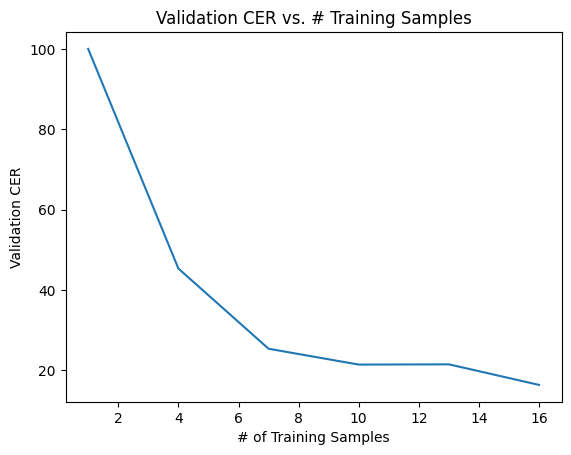

In [7]:
# Full User 16.41
# 13 21.53
# 10 21.47
# 7 25.41
# 4 45.37
# 1 100 (no change after epoch 2)
import matplotlib.pyplot as plt

train_samples = [16, 13, 10, 7, 4, 1]
CER = [16.41, 21.53, 21.47, 25.41, 45.37, 100]

plt.plot( train_samples, CER )
plt.title( "Validation CER vs. # Training Samples" )
plt.xlabel( "# of Training Samples" )
plt.ylabel( "Validation CER" )
plt.savefig( "TrainSampleVsCER.png" )